# --------------------------------------- Workshop #3 -------------------------------------


* This workshop includes marked tasks that comprise 25% of your final mark in this module. 

* You need to read the examples in the 'Lecture #3 - examples' notebook to complete the tasks. 

# Task

## TASK 3.1: Apply four classifiers discussed in Lecture #3, i.e. Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), and K-nearest neighbours (KNN) classifiers to the adult_WS#3 dataset available on Canvas to predict the income column. Calculate the confusion matrix and evaluation metrics for all classifiers. Plot the features' importance values, determine the three most important features (i.e. columns) which have the highest impact on the income and report them in the report cell  (25%). 

## NOTE 1: To decrease the processing time, use an ordinal encoder for both nominal and ordinal input columns. You don't need to apply the one hot encoder to nominal columns. 

## NOTE 2 You are expected to improve your models in any way possible to get as high accuracy as possible.

## NOTE 3: You should add comments on your code wherever necessary and briefly explain what the code is doing

## NOTE 4: Completing the report cell is required only for reporting the three most important features. Other explanations are optional. 

## NOTE5: You will still get some marks if your code doesn't run, but you have written some codes and have added comments on the code. 


# Importing necessary libraries

In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

#Import the important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#import the classifiers

SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()



In [2]:
#importing the dataset
adult = pd.read_csv('C:/Users/Uche Buzz/Desktop/School stuff/Data Mining and Infomatics/Dataset/adult_WS#3.csv')

In [3]:
# Exploring the dataset
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [4]:
# Exploring the dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [5]:
adult.shape

(10000, 15)

In [6]:
adult.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [7]:
adult.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [8]:
adult.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [9]:
adult = adult.dropna(how='any',axis=0) 

In [10]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

   # Preparing Data for Splitting

In [11]:
#Extracting input and output data
X = adult.drop('income',axis=1)
y = adult.iloc[:,14]

In [12]:
y

0        >50K
1       <=50K
2       <=50K
3        >50K
4       <=50K
        ...  
9995    <=50K
9996    <=50K
9997    <=50K
9998     >50K
9999    <=50K
Name: income, Length: 9765, dtype: object

In [13]:
#Encoding the columns
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
X[['education','workclass','marital-status', 'occupation',
       'sex', 'native-country','race','relationship']] = encoder.fit_transform(X[['education',
                                                                                      'workclass','marital-status', 'occupation', 'sex', 'native-country','race','relationship']])

In [14]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29,4.0,216481,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,38.0
1,36,4.0,280570,15.0,10,2.0,3.0,0.0,4.0,1.0,0,0,45,38.0
2,25,0.0,100903,9.0,13,2.0,0.0,5.0,4.0,0.0,0,0,25,38.0
3,47,4.0,145636,8.0,11,2.0,6.0,0.0,4.0,1.0,0,0,48,38.0
4,33,4.0,119422,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,40,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,4.0,63363,15.0,10,4.0,12.0,3.0,4.0,0.0,0,0,30,38.0
9996,53,4.0,58535,11.0,9,0.0,12.0,1.0,4.0,0.0,0,0,40,38.0
9997,30,4.0,342709,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0
9998,41,6.0,134724,8.0,11,2.0,8.0,5.0,4.0,0.0,3103,0,40,38.0


In [15]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [16]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [17]:
#normalising the input data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [18]:
# splittig the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying the calssifiers

## 1. Decision Tree

In [19]:
#Fit the model
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred =DT.predict(X_test)

In [21]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

Text(0.5, 1.0, 'DT')

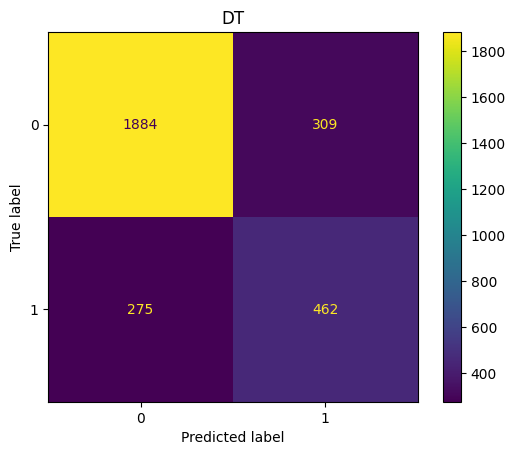

In [22]:
#plot the confusion matrix

cm4 = confusion_matrix(y_test, y_pred, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [25]:
#print the results

print(f"Recall: {recall}")
print(f"fl score: {f1}")
print(f"Confusion Matrix: {cm}")  
print(f"accurracy: {accuracy}")
print(f"precision: {precision}")


Recall: 0.6268656716417911
fl score: 0.6127320954907162
Confusion Matrix: [[1884  309]
 [ 275  462]]
accurracy: 0.8006825938566553
precision: 0.5992217898832685


## 2. Random Forest

In [26]:
#Fit the model

RF.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred2 = RF.predict(X_test)

In [28]:
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

Text(0.5, 1.0, 'Random forest')

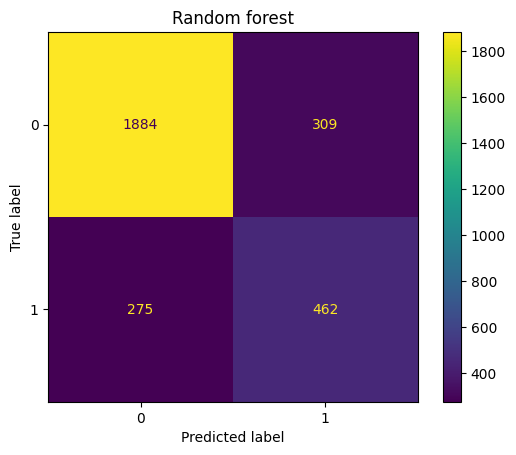

In [29]:
#Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred2, labels = RF.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm4,display_labels= RF.classes_)
disp.plot()
plt.title("Random forest")

In [30]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)

In [31]:
#print them
print(f"Recall: {recall}")
print(f"fl score: {f1}")
print(f"Confusion Matrix: {cm}")  
print(f"accurracy: {accuracy}")
print(f"precision: {precision}")

Recall: 0.6187245590230664
fl score: 0.6671543525969276
Confusion Matrix: [[2019  174]
 [ 281  456]]
accurracy: 0.8447098976109215
precision: 0.7238095238095238


## 3. K-nearest neighbours (KNN)

In [32]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred4 = KNN.predict(X_test)

In [34]:
y_pred4

array([0, 1, 0, ..., 1, 0, 1])

Text(0.5, 1.0, 'KNN')

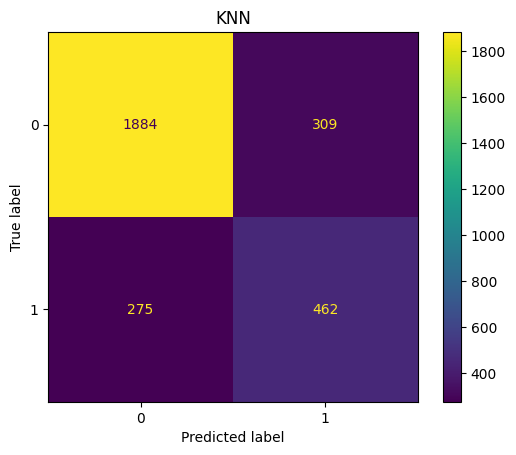

In [35]:
cm = confusion_matrix(y_test, y_pred4, labels = KNN.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm4,display_labels= KNN.classes_)
disp.plot()
plt.title("KNN")

In [36]:
accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
cm = confusion_matrix(y_test, y_pred4)

In [37]:
#print them
print(f"Recall: {recall}")
print(f"fl score: {f1}")
print(f"Confusion Matrix: {cm}")  
print(f"accurracy: {accuracy}")
print(f"precision: {precision}")

Recall: 0.5549525101763908
fl score: 0.6005873715124816
Confusion Matrix: [[1977  216]
 [ 328  409]]
accurracy: 0.8143344709897611
precision: 0.6544


# 4. SVM

In [38]:
SVM.fit(X_train, y_train)

SVC()

In [39]:
y_pred5 = SVM.predict(X_test)

In [40]:
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'SVM')

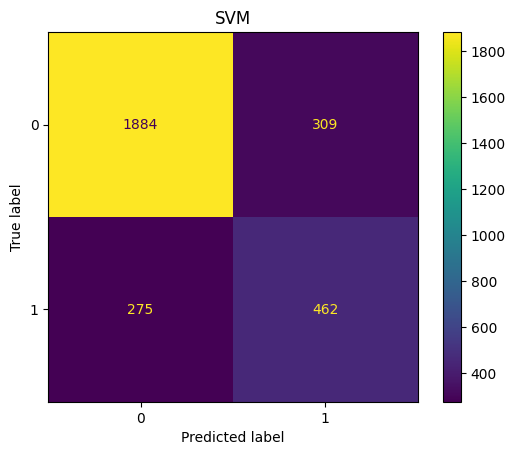

In [41]:
cm = confusion_matrix(y_test, y_pred5, labels = SVM.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix = cm4,display_labels = SVM.classes_)
disp.plot()
plt.title("SVM")

In [42]:
accuracy = accuracy_score(y_test, y_pred5)
precision = precision_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
cm = confusion_matrix(y_test, y_pred5)

In [43]:
#print the Results
print(f"Recall: {recall}")
print(f"fl score: {f1}")
print(f"Confusion Matrix: {cm}")  
print(f"accurracy: {accuracy}")
print(f"precision: {precision}")

Recall: 0.4830393487109905
fl score: 0.5821749795584628
Confusion Matrix: [[2063  130]
 [ 381  356]]
accurracy: 0.8255972696245734
precision: 0.7325102880658436


## Finding the most important Features

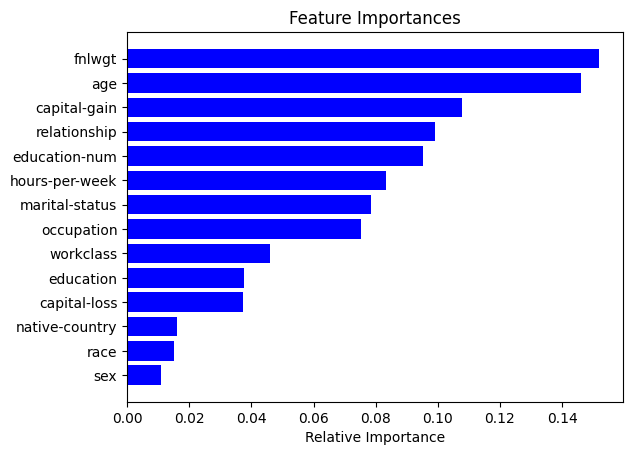

In [44]:
# Getting the most important features
features = adult.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

                      # WRITE YOUR REPORT IN THIS CELL (IF APPLICABLE) 

In order to get a more accurate result, there was need for a better pre-processing technique which I adopted. Using a better preprocessing
Technique improves the model

## Random Forest
From the observation we see that the model worked well in Random Forest but not very well in precision. this may be as a result of several factors

accurracy: 0.8447098976109215
precision: 0.7238095238095238

If you also observe the matrix, you will observe that it also aligns with correct observation of the above

## SVM
From the observation we see that the model worked well in SVM, as its prediction was close to accurate. this may be as a result of several factors

accurracy: 0.8255972696245734
precision: 0.7325102880658436

If you also observe the matrix, you will observe that it also aligns with correct observation of the above

## Decision Tree
From the observation we see that the model worked well in Decision tree but not very well in precision. this may be as a result of several factors

accurracy: 0.8006825938566553
precision: 0.5992217898832685

If you also observe the matrix, you will observe that it also aligns with correct observation of the above

## KNN

From the observation we see that the model didnt perform best with KNN. this may be as a result of several factors and the data being one of them

accurracy: 0.8143344709897611
precision: 0.6544

## Important Features
From our analysis, we see that the important features are:
- fnlwglt
- Age
- Capital Gain
- Relationship
